## Convert pdf to text

### Import librairy

In [1]:
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

### Creat convert function

In [2]:
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

### Test

In [3]:
text = extract_text_from_pdf(r'E:\politik\test_text\discours\de_gaule\Discours-de-Rennes.pdf')
print(text)

Discours de Rennes, 27 juillet 1947   Parlant au terrain de la Croix-Rouge, le général de Gaulle inaugure la série des discours par lesquels il va appeler les Français à se rassembler et dénonce le péril communiste, tel qu'il vient de se manifester à l'occasion de la Conférence de Paris et du Plan Marshall  Au milieu de la confusion d'une vie tourmentée, rien n'importe plus au peuple français que de regarder en face les causes profondes de son inquiétude, afin d'y voir clair sur la route qu'il lui faut suivre. Son unité ébranlée, alors qu'il est en proie aux pires difficultés intérieures, qu'il voit se dessiner au-dehors une situation dangereuse et qu'il mesure l'impuissance du régime qui s'est chargé de le guider, voilà - tous le sentent, même si certains refusent de l'avouer - pourquoi ce n'est pas sans trouble que la France interroge l'horizon. L'unité de la nation, c'est-à-dire la volonté commune des Français d'être et de rester Français, quoi qu'il arrive, avait, au cours du drame

## DataViz

### Wordcloud

#### Import librairy

In [26]:
from PIL import Image
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud
import numpy as np
import os
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

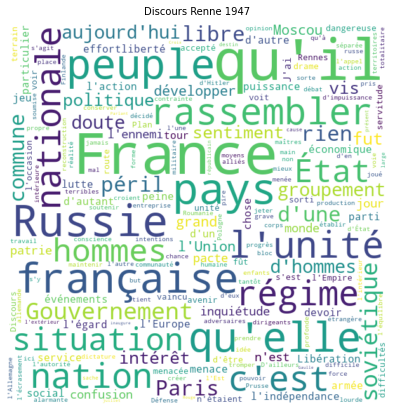

In [39]:
def wordcloud(text,title) :
    add_stopwords = ['tout', 'plus', 'fait', 'voilà', 'faut', 'toujours', 'temps', 'pouvoirs',
                        'enfin', 'pourquoi', 'moment', 'si', 'mesure', 'quand', 'celui', 'ans', 'part', 'vive', 'faire',
                        'quant', 'alors', 'aucune', 'toute', 'donc', 'comme', 'aujourd', 'hui', 'dont', 'sans', 'tous',
                        'toutes', 'bien', 'où', 'cette', 'peut', 'milieu', 'peu', 'elles', 'parce', 'entre', 'entres', 'ils',
                        'dit', 'plus', 'moins', 'font', 'doit', 'dis', 'là', 'dessus', 'mêmes', 'ceux', 'ci', 'çi', 'dire',
                        'aussi', 'car', 'cela', 'fois', 'sous', 'général', 'depuis', 'autre', 'ni', 'entre', 'grande', 'leurs',
                        'leur', 'abord', 'chacun', 'être', 'autres', 'être', 'avec', 'contre', 'deux', 'français']
    stop_words = list(fr_stop) + add_stopwords
#     # Définir un masque
#     mask = np.array(Image.open('coeur.png'))
#     # Définir le calque du nuage des mots
    wc = WordCloud(width=600, height=600, background_color='white', max_words=200, stopwords=stop_words, max_font_size=90, collocations=False, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (10,7))
    wc.generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=10, pad=10)
    plt.show()
    
wordcloud(text,'Discours Renne 1947')

### Bar plot

### Import librairies

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [71]:
def get_top_n_words(text, n=None):
    add_stopwords = ['tout', 'plus', 'fait', 'voilà', 'faut', 'toujours', 'temps', 'pouvoirs',
                        'enfin', 'pourquoi', 'moment', 'si', 'mesure', 'quand', 'celui', 'ans', 'part', 'vive', 'faire',
                        'quant', 'alors', 'aucune', 'toute', 'donc', 'comme', 'aujourd', 'hui', 'dont', 'sans', 'tous',
                        'toutes', 'bien', 'où', 'cette', 'peut', 'milieu', 'peu', 'elles', 'parce', 'entre', 'entres', 'ils',
                        'dit', 'plus', 'moins', 'font', 'doit', 'dis', 'là', 'dessus', 'mêmes', 'ceux', 'ci', 'çi', 'dire',
                        'aussi', 'car', 'cela', 'fois', 'sous', 'général', 'depuis', 'autre', 'ni', 'entre', 'grande', 'leurs',
                        'leur', 'abord', 'chacun', 'être', 'autres', 'être', 'avec', 'contre', 'deux', 'français']
    stop_words = list(fr_stop) + add_stopwords
    # Création de la transformation TF-IDF
    text = [text]
    print(type(text))
    vectorizer = TfidfVectorizer(analyzer=u'word', lowercase=True, stop_words=set(stop_words), max_features=15000)
    vectorizer.fit(text)
    # print(vectorizer.vocabulary_)
    # print(vectorizer.idf_)
    # encode document
    bag_of_words = vectorizer.fit_transform(text)
    # print(vector.shape)
    # print(vector.toarray())
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [72]:
common_words_text_tot = get_top_n_words(text, 20)

<class 'list'>


e:\politik\test_text\venv\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(


qu 0.6004264898062519
france 0.3079110204134625
pays 0.15395551020673126
russie 0.15395551020673126
unité 0.13855995918605812
hommes 0.13855995918605812
française 0.123164408165385
rassembler 0.10776885714471188
peuple 0.09237330612403875
régime 0.09237330612403875
nationale 0.09237330612403875
situation 0.07697775510336563
nation 0.07697775510336563
gouvernement 0.07697775510336563
union 0.07697775510336563
soviétique 0.07697775510336563
paris 0.0615822040826925
rien 0.0615822040826925
commune 0.0615822040826925
indépendance 0.0615822040826925


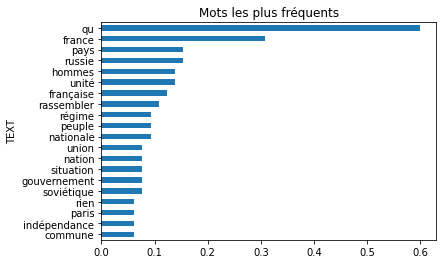

In [73]:
for word, freq in common_words_text_tot:
    print(word, freq)
df_text_tot = pd.DataFrame(common_words_text_tot, columns=['TEXT', 'count'])
df_text_tot.groupby('TEXT').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',title='Mots les plus fréquents')
plt.show()